In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, r2_score, mean_absolute_error
import math

import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import sklearn
from sklearn.tree import export_graphviz
import graphviz
from collections import Counter

from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
scaler_min_max = MinMaxScaler(feature_range=(0, 1))

from IPython.display import Image
from scipy.stats import norm
from scipy.signal import argrelextrema

pd.set_option('display.max_columns', None)

In [101]:
prices = pd.read_csv("useful_data/round_2_day_1_joined_table.csv")
prices.rename(columns={prices.columns[0]: 'timestamp'}, inplace=True)
prices

,timestamp,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY,total_ask_vol,total_bid_vol,ask_vwap,bid_vwap,spread
0,0,1094.0,10.0,1093.0,3.0,1086.0,41.0,1102.0,10.0,1104.0,3.0,1111.0,41.0,1098.0,0.000000,1098.25,0.9,10.5,-5.0,2100.0000,70.000000,1,54.0,54.0,1108.944444,1087.870370,8.0
1,100,1094.0,6.0,1093.0,2.0,1087.0,51.0,1102.0,6.0,1103.0,2.0,1110.0,51.0,1098.0,0.000000,1098.25,0.9,9.5,-5.0,2099.7570,70.022710,1,59.0,59.0,1108.949153,1087.915254,8.0
2,200,1093.0,6.0,1092.0,3.0,1085.0,49.0,1101.0,6.0,1102.0,3.0,1108.0,49.0,1097.0,109600.000000,1096.75,0.9,9.5,-5.0,2099.5132,70.045395,1,58.0,58.0,1106.965517,1086.189655,8.0
3,300,1093.0,10.0,1092.0,4.0,1085.0,52.0,1101.0,10.0,1102.0,4.0,1109.0,52.0,1097.0,109600.000000,1097.00,0.9,9.5,-5.0,2099.2683,70.068030,1,66.0,66.0,1107.363636,1086.636364,8.0
4,400,1093.0,10.0,1092.0,3.0,1086.0,51.0,1101.0,10.0,1102.0,3.0,1109.0,51.0,1097.0,109600.000000,1097.25,0.9,9.5,-5.0,2099.0225,70.090640,1,64.0,64.0,1107.421875,1087.375000,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,99500,1067.0,5.0,1066.0,4.0,1060.0,43.0,1074.0,5.0,1075.0,4.0,1082.0,43.0,1070.5,111088.679688,1070.75,1.1,8.5,-5.5,1701.2242,84.906700,1,52.0,52.0,1080.692308,1061.134615,7.0
996,99600,1068.0,7.0,1067.0,2.0,1061.0,46.0,1075.0,7.0,1076.0,2.0,1083.0,46.0,1071.5,111088.679688,1071.75,1.1,8.5,-5.5,1700.9775,84.925300,1,55.0,55.0,1081.727273,1062.109091,7.0
997,99700,1068.0,5.0,1067.0,3.0,1061.0,48.0,1076.0,5.0,1077.0,3.0,1083.0,48.0,1072.0,111088.679688,1072.00,1.1,8.5,-5.5,1700.7317,84.943930,1,56.0,56.0,1082.053571,1061.946429,8.0
998,99800,1068.0,8.0,1067.0,3.0,1061.0,49.0,1075.0,8.0,1076.0,3.0,1083.0,49.0,1071.5,111088.679688,1071.75,1.1,8.5,-5.5,1700.4869,84.962590,1,60.0,60.0,1081.583333,1062.233333,7.0


In [102]:
prices_neg1 = pd.read_csv("../../data2024/round-2-island-data-bottle/prices_round_2_day_-1.csv", sep=";")

day = prices_neg1.columns[-1]
new_order = [day] + [col for col in prices_neg1.columns if col != day] 
prices_neg1 = prices_neg1[new_order]

prices_columns_to_convert = ['day', 'timestamp', 'ORCHIDS', 'TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF', 'SUNLIGHT', 'HUMIDITY']
for col in prices_columns_to_convert:
    prices_neg1[col] = pd.to_numeric(prices_neg1[col], errors='coerce')
    
prices_0 = pd.read_csv("../../data2024/round-2-island-data-bottle/prices_round_2_day_0.csv", sep=";")

day = prices_0.columns[-1]
new_order = [day] + [col for col in prices_0.columns if col != day] 
prices_0 = prices_0[new_order]

prices_columns_to_convert = ['day', 'timestamp', 'ORCHIDS', 'TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF', 'SUNLIGHT', 'HUMIDITY']
for col in prices_columns_to_convert:
    prices_0[col] = pd.to_numeric(prices_0[col], errors='coerce')

prices_pos1 = pd.read_csv("../../data2024/round-2-island-data-bottle/prices_round_2_day_1.csv", sep=";")

day = prices_pos1.columns[-1]
new_order = [day] + [col for col in prices_pos1.columns if col != day] 
prices_pos1 = prices_pos1[new_order]

prices_columns_to_convert = ['day', 'timestamp', 'ORCHIDS', 'TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF', 'SUNLIGHT', 'HUMIDITY']
for col in prices_columns_to_convert:
    prices_pos1[col] = pd.to_numeric(prices_pos1[col], errors='coerce')

orchids = pd.concat([prices_neg1, prices_0, prices_pos1], ignore_index=True)
orchids['new_timestamp'] = orchids['timestamp']
orchids.loc[10001:, 'new_timestamp'] += 1000100
orchids.loc[20002:, 'new_timestamp'] += 1000100
orchids

,day,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,new_timestamp
0,-1,0,1200.00,1.5,10.5,-2.0,2500.0000,79.00000,0
1,-1,100,1201.75,1.5,9.5,-2.0,2499.4197,79.00410,100
2,-1,200,1201.75,1.5,9.5,-2.0,2498.8457,79.00821,200
3,-1,300,1201.75,1.5,9.5,-2.0,2498.2780,79.01234,300
4,-1,400,1201.75,1.5,9.5,-2.0,2497.7166,79.01649,400
...,...,...,...,...,...,...,...,...,...
29998,1,999600,1036.25,0.9,9.5,-5.0,2299.9436,69.93549,2999800
29999,1,999700,1036.25,0.9,9.5,-5.0,2299.9556,69.95153,2999900
30000,1,999800,1036.25,0.9,9.5,-5.0,2299.9690,69.96762,3000000
30001,1,999900,1034.25,0.9,9.5,-5.0,2299.9840,69.98378,3000100


In [103]:
orchids['alt_sun'] = np.where(orchids['SUNLIGHT'] >= 2500, orchids['SUNLIGHT'], 0) / 100 # overpowers SUNLIGHT sometimes
orchids['alt_cum_sun'] = orchids.groupby('day')['alt_sun'].cumsum() / 10000 # no
orchids['alt_remain_sun'] = (25*7/12 - np.minimum(orchids['alt_cum_sun'], 25*7/12)) * 12 / 7 # yes
orchids['alt_remain_sun_exp'] = np.exp(orchids['alt_remain_sun']) / 100
orchids['sun_roll'] = orchids['SUNLIGHT'].rolling(window=round(10000*7/12), min_periods = 1).mean()

orchids['sun_change'] = orchids['SUNLIGHT'].pct_change() * 10000 # yes
orchids['sun_diff'] = orchids['SUNLIGHT'].diff() * 100 # yes

orchids['hum_dist'] = orchids['HUMIDITY'] - 70
orchids['abs_hum_dist'] = orchids['hum_dist'].abs() # keep
orchids['alt_hum_dist'] = np.maximum(orchids['abs_hum_dist'] - 10, 0) # not as good

orchids['hum_exp'] = np.exp(orchids['abs_hum_dist'])
orchids['alt_hum_exp'] = np.exp(orchids['alt_hum_dist'])
                                     
orchids['high_low_humidity'] = ((orchids['HUMIDITY'] < 60) | (orchids['HUMIDITY'] > 80)).astype(int) # indicator
orchids['mid_humidity'] = ((orchids['HUMIDITY'] >= 60) | (orchids['HUMIDITY'] <= 80)).astype(int) # indicator

orchids['hum_change'] = orchids['HUMIDITY'].pct_change() * 1000000
orchids['hum_diff'] = orchids['HUMIDITY'].diff() * 10000 # yes
orchids['abs_hum_dist_diff'] = orchids['abs_hum_dist'].diff()

orchids['hl_hum_ind'] = ((orchids['abs_hum_dist_diff'] < 0)).astype(int) * orchids['high_low_humidity']
orchids['hl_hum_ind_v2'] = np.sign(orchids['abs_hum_dist_diff']) * orchids['high_low_humidity']



orchids['hum_avg'] = orchids.groupby('day')['HUMIDITY'].expanding().mean().reset_index(level=0, drop=True)
orchids['hum_avg_dist'] = orchids['hum_avg'] - 70
orchids['abs_hum_avg_dist'] = orchids['hum_avg_dist'].abs()

orchids['roll_hum_avg'] = orchids.groupby('day')['HUMIDITY'].transform(lambda x: x.rolling(window=70, min_periods=1).mean())
orchids['roll_hum_avg_dist'] = orchids['roll_hum_avg'] - 70
orchids['abs_roll_hum_avg_dist'] = orchids['roll_hum_avg_dist'].abs()

# orchids['hum_diff_hl'] = 

orchids['tte'] = (10000000 - orchids['timestamp']) / 100000

orchids['hum_dist_change_tte'] = orchids['tte'] * orchids['hum_change'] * orchids['abs_hum_dist']
orchids['sun_hum'] = orchids['hum_dist'] * orchids['SUNLIGHT'] / 100
orchids['abs_sun_hum'] = orchids['abs_hum_dist'] * orchids['SUNLIGHT'] / 100
orchids['alt_sun_hum'] = orchids['alt_hum_dist'] * orchids['SUNLIGHT'] / 100

orchids['orchid_diff'] = orchids['ORCHIDS'].diff()
orchids['orchid_roll_day'] = orchids['ORCHIDS'].rolling(window=25, min_periods=1).mean()
orchids['orchid_roll_shift'] = orchids.groupby('day')['orchid_roll_day'].shift(-25)
orchids['orchid_shift'] = orchids.groupby('day')['ORCHIDS'].shift(-399)
orchids['pnl'] = orchids['orchid_roll_shift'] - orchids['ORCHIDS']

# orchids['orchid_sun'] = orchids['orchid_diff'] / orchids['SUNLIGHT'].diff()
# orchids['orchid_hum'] = orchids['orchid_diff'] / orchids['HUMIDITY'].diff()

features = ['TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF', 'SUNLIGHT', 'HUMIDITY', 'tte']
features_mid_hum = ['alt_cum_sun', 'alt_remain_sun', 'sun_change', 'sun_diff', 'abs_hum_dist',
                        'hum_change', 'hum_diff', 'hum_avg', 
                        'hum_avg_dist', 'abs_roll_hum_avg_dist', 
                       'SUNLIGHT', 'EXPORT_TARIFF', 'IMPORT_TARIFF'] # ,'TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF', 'HUMIDITY'
features_hl_hum = ['alt_cum_sun', 'alt_remain_sun', 'sun_change', 'sun_diff', 'abs_hum_dist',
                        'hum_change', 'hum_diff', 'hum_avg', 'roll_hum_avg', 'hl_hum_ind_v2', 
                        'hum_avg_dist', 'roll_hum_avg_dist',
                       'SUNLIGHT', 'TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF'] # ,'TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF', 'HUMIDITY'

orchids#[orchids['hl_hum_ind_v2']==0]

,day,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,new_timestamp,alt_sun,alt_cum_sun,alt_remain_sun,alt_remain_sun_exp,sun_roll,sun_change,sun_diff,hum_dist,abs_hum_dist,alt_hum_dist,hum_exp,alt_hum_exp,high_low_humidity,mid_humidity,hum_change,hum_diff,abs_hum_dist_diff,hl_hum_ind,hl_hum_ind_v2,hum_avg,hum_avg_dist,abs_hum_avg_dist,roll_hum_avg,roll_hum_avg_dist,abs_roll_hum_avg_dist,tte,hum_dist_change_tte,sun_hum,abs_sun_hum,alt_sun_hum,orchid_diff,orchid_roll_day,orchid_roll_shift,orchid_shift,pnl
0,-1,0,1200.00,1.5,10.5,-2.0,2500.0000,79.00000,0,25.0,0.002500,24.995714,7.169697e+08,2500.000000,NaN,NaN,9.00000,9.00000,0.0,8103.083928,1.0,0,1,NaN,NaN,NaN,0,NaN,79.000000,9.000000,9.000000,79.000000,9.000000,9.000000,100.000,NaN,225.000000,225.000000,0.0,NaN,1200.000000,1200.28,1201.00,0.28
1,-1,100,1201.75,1.5,9.5,-2.0,2499.4197,79.00410,100,0.0,0.002500,24.995714,7.169697e+08,2499.709850,-2.321200,-58.03,9.00410,9.00410,0.0,8136.374771,1.0,0,1,51.898734,41.0,0.00410,0,0.0,79.002050,9.002050,9.002050,79.002050,9.002050,9.002050,99.999,46729.671939,225.050249,225.050249,0.0,1.75,1200.875000,1200.06,1202.25,-1.69
2,-1,200,1201.75,1.5,9.5,-2.0,2498.8457,79.00821,200,0.0,0.002500,24.995714,7.169697e+08,2499.421800,-2.296533,-57.40,9.00821,9.00821,0.0,8169.884086,1.0,0,1,52.022617,41.1,0.00411,0,0.0,79.004103,9.004103,9.004103,79.004103,9.004103,9.004103,99.998,46862.128200,225.101268,225.101268,0.0,0.00,1201.166667,1199.84,1203.25,-1.91
3,-1,300,1201.75,1.5,9.5,-2.0,2498.2780,79.01234,300,0.0,0.002500,24.995714,7.169697e+08,2499.135850,-2.271849,-56.77,9.01234,9.01234,0.0,8203.695480,1.0,0,1,52.273049,41.3,0.00413,0,0.0,79.006163,9.006163,9.006163,79.006163,9.006163,9.006163,99.997,47108.835362,225.153308,225.153308,0.0,0.00,1201.312500,1199.66,1205.25,-2.09
4,-1,400,1201.75,1.5,9.5,-2.0,2497.7166,79.01649,400,0.0,0.002500,24.995714,7.169697e+08,2498.852000,-2.247148,-56.14,9.01649,9.01649,0.0,8237.811558,1.0,0,1,52.523441,41.5,0.00415,0,0.0,79.008228,9.008228,9.008228,79.008228,9.008228,9.008228,99.996,47355.813994,225.206367,225.206367,0.0,0.00,1201.400000,1199.44,1203.25,-2.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29998,1,999600,1036.25,0.9,9.5,-5.0,2299.9436,69.93549,2999800,0.0,9.325774,9.012959,8.208777e+01,2706.353010,0.046088,1.06,-0.06451,0.06451,0.0,1.066636,1.0,0,1,228.405458,159.7,-0.01597,0,-0.0,77.565791,7.565791,7.565791,69.431221,-0.568779,0.568779,90.004,1326.158187,-1.483694,1.483694,0.0,-2.50,1047.060000,NaN,NaN,NaN
29999,1,999700,1036.25,0.9,9.5,-5.0,2299.9556,69.95153,2999900,0.0,9.325774,9.012959,8.208777e+01,2706.366777,0.052175,1.20,-0.04847,0.04847,0.0,1.049664,1.0,0,1,229.354223,160.4,-0.01604,0,-0.0,77.565029,7.565029,7.565029,69.445203,-0.554797,0.554797,90.003,1000.545279,-1.114788,1.114788,0.0,0.00,1046.400000,NaN,NaN,NaN
30000,1,999800,1036.25,0.9,9.5,-5.0,2299.9690,69.96762,3000000,0.0,9.325774,9.012959,8.208777e+01,2706.380622,0.058262,1.34,-0.03238,0.03238,0.0,1.032910,1.0,0,1,230.016413,160.9,-0.01609,0,-0.0,77.564270,7.564270,7.564270,69.459244,-0.540756,0.540756,90.002,670.328726,-0.744730,0.744730,0.0,0.00,1045.780000,NaN,NaN,NaN
30001,1,999900,1034.25,0.9,9.5,-5.0,2299.9840,69.98378,3000100,0.0,9.325774,9.012959,8.208777e+01,2706.394547,0.065218,1.50,-0.01622,0.01622,0.0,1.016352,1.0,0,1,230.963980,161.6,-0.01616,0,-0.0,77.563511,7.563511,7.563511,69.473344,-0.526656,0.526656,90.001,337.164965,-0.373057,0.373057,0.0,-2.00,1045.160000,NaN,NaN,NaN


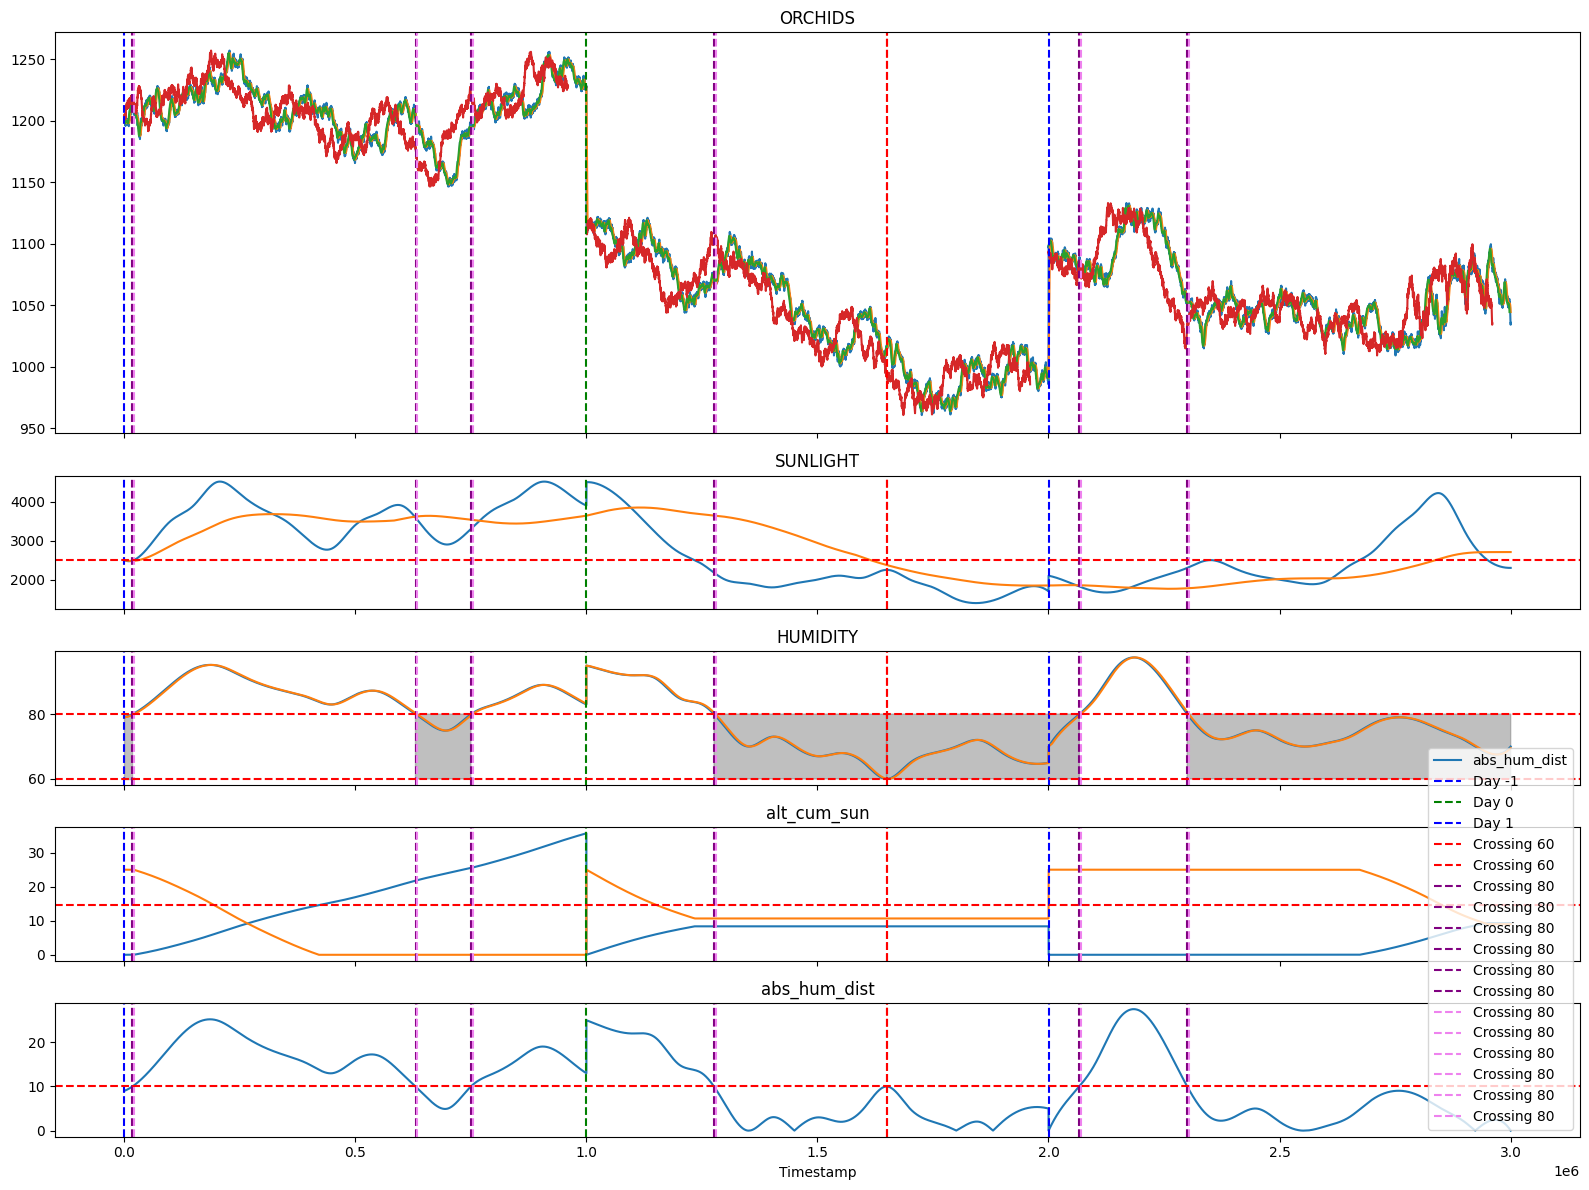

In [104]:
def plot_orchids_sunlight_humidity(df):
    fig, axs = plt.subplots(5, 1, sharex=True, figsize=(16, 12), gridspec_kw={'height_ratios': [3, 1, 1, 1, 1]})
    
    # Plot ORCHIDS vs new_timestamp
    axs[0].plot(df['new_timestamp'], df['ORCHIDS'], label='ORCHIDS')
    axs[0].plot(df['new_timestamp'], df['orchid_roll_day'], label='roll')
    axs[0].plot(df['new_timestamp'], df['orchid_roll_shift'], label='roll_shift')
    axs[0].plot(df['new_timestamp'], df['orchid_shift'], label='SHIFT')
    axs[0].set_title('ORCHIDS')
    
    # Plot SUNLIGHT vs new_timestamp
    axs[1].plot(df['new_timestamp'], df['SUNLIGHT'], label='SUNLIGHT')
    axs[1].plot(df['new_timestamp'], df['sun_roll'], label='sun_roll')
    axs[1].set_title('SUNLIGHT')
    
    # Plot HUMIDITY vs new_timestamp
    axs[2].plot(df['new_timestamp'], df['HUMIDITY'], label='HUMIDITY')
    axs[2].plot(df['new_timestamp'], df['roll_hum_avg'], label='roll_hum_avg')
    axs[2].set_title('HUMIDITY')
    
    # Plot cum_sun vs new_timestamp
    axs[3].plot(df['new_timestamp'], df['alt_cum_sun'], label='alt_cum_sun')
    axs[3].plot(df['new_timestamp'], df['alt_remain_sun'], label='alt_remain_sun')
    axs[3].set_title('alt_cum_sun')

    # HUM dist
    axs[4].plot(df['new_timestamp'], df['abs_hum_dist'], label='abs_hum_dist')
    axs[4].set_title('abs_hum_dist')
    
    # Add vertical lines at timestamps to signify day for all plots
    for ax in axs:
        ax.axvline(0, color='blue', linestyle='--', label='Day -1')
        ax.axvline(1000100, color='green', linestyle='--', label='Day 0')
        ax.axvline(2000200, color='blue', linestyle='--', label='Day 1')

        # Detecting threshold crossings for HUMIDITY at 60 and 80
    for threshold in [60, 80]:
        # Shift humidity data down by one to compare with the previous row
        shifted_humidity = df['HUMIDITY'].shift(1)
        # Crossing up the threshold
        crossing_up = (df['HUMIDITY'] > threshold) & (shifted_humidity <= threshold)
        # Crossing down the threshold
        crossing_down = (df['HUMIDITY'] < threshold) & (shifted_humidity >= threshold)
        # Combine crossing up and down
        crossings = crossing_up | crossing_down

        # Draw vertical lines at crossings
        for timestamp in df.loc[crossings, 'new_timestamp']:
            for ax in axs:
                ax.axvline(timestamp, color='red' if threshold == 60 else 'purple', linestyle='--', 
                           label=f'Crossing {threshold}')
                
        # Shift humidity data down by one to compare with the previous row
        shifted_humidity1 = df['roll_hum_avg'].shift(1)
        # Crossing up the threshold
        crossing_up1 = (df['roll_hum_avg'] > threshold) & (shifted_humidity1 <= threshold)
        # Crossing down the threshold
        crossing_down1 = (df['roll_hum_avg'] < threshold) & (shifted_humidity1 >= threshold)
        # Combine crossing up and down
        crossings1 = crossing_up1 | crossing_down1

        # Draw vertical lines at crossings
        for timestamp in df.loc[crossings1, 'new_timestamp']:
            for ax in axs:
                ax.axvline(timestamp, color='pink' if threshold == 60 else 'violet', linestyle='--', 
                           label=f'Crossing {threshold}')
    
    # Highlighting region between 60 and 80 for HUMIDITY
    axs[2].fill_between(df['new_timestamp'], 60, 80, where=(df['HUMIDITY'] >= 60) & (df['HUMIDITY'] <= 80), color='gray', alpha=0.5, label='Target Humidity Zone')
    
    # Red lines for thresholds
    axs[1].axhline(2500, color='red', linestyle='--', label='Sunlight Threshold')
    axs[2].axhline(60, color='red', linestyle='--')
    axs[2].axhline(80, color='red', linestyle='--')
    axs[3].axhline(25*7/12, color='red', linestyle='--', label='Cum Sun Threshold')
    axs[4].axhline(10, color='red', linestyle='--')

    axs[-1].set_xlabel('Timestamp')
    
    plt.tight_layout()
    plt.legend()
    plt.show()

plot_orchids_sunlight_humidity(orchids)

In [105]:
# target_humidity_df = orchids[(orchids['HUMIDITY'] >= 60) & (orchids['HUMIDITY'] <= 80) & (orchids['day'] == -1) & (orchids['timestamp'] > 745000)].reset_index()
# target_humidity_df.head(50)

In [106]:
orchids_cleaned = orchids[(orchids['abs_hum_dist'] <= 10) & (orchids['day'] <= 1)].dropna().copy() #  & (orchids['SUNLIGHT'] < 2500) 
X = orchids_cleaned[features_mid_hum].copy()
y = orchids_cleaned['orchid_shift']
orchids_cleaned

,day,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,new_timestamp,alt_sun,alt_cum_sun,alt_remain_sun,alt_remain_sun_exp,sun_roll,sun_change,sun_diff,hum_dist,abs_hum_dist,alt_hum_dist,hum_exp,alt_hum_exp,high_low_humidity,mid_humidity,hum_change,hum_diff,abs_hum_dist_diff,hl_hum_ind,hl_hum_ind_v2,hum_avg,hum_avg_dist,abs_hum_avg_dist,roll_hum_avg,roll_hum_avg_dist,abs_roll_hum_avg_dist,tte,hum_dist_change_tte,sun_hum,abs_sun_hum,alt_sun_hum,orchid_diff,orchid_roll_day,orchid_roll_shift,orchid_shift,pnl
1,-1,100,1201.75,1.5,9.5,-2.0,2499.4197,79.004100,100,0.0,0.002500,24.995714,7.169697e+08,2499.709850,-2.321200,-58.03,9.004100,9.004100,0.0,8136.374771,1.0,0,1,51.898734,41.00,0.004100,0,0.0,79.002050,9.002050,9.002050,79.002050,9.002050,9.002050,99.999,46729.671939,225.050249,225.050249,0.0,1.75,1200.875000,1200.06,1202.25,-1.69
2,-1,200,1201.75,1.5,9.5,-2.0,2498.8457,79.008210,200,0.0,0.002500,24.995714,7.169697e+08,2499.421800,-2.296533,-57.40,9.008210,9.008210,0.0,8169.884086,1.0,0,1,52.022617,41.10,0.004110,0,0.0,79.004103,9.004103,9.004103,79.004103,9.004103,9.004103,99.998,46862.128200,225.101268,225.101268,0.0,0.00,1201.166667,1199.84,1203.25,-1.91
3,-1,300,1201.75,1.5,9.5,-2.0,2498.2780,79.012340,300,0.0,0.002500,24.995714,7.169697e+08,2499.135850,-2.271849,-56.77,9.012340,9.012340,0.0,8203.695480,1.0,0,1,52.273049,41.30,0.004130,0,0.0,79.006163,9.006163,9.006163,79.006163,9.006163,9.006163,99.997,47108.835362,225.153308,225.153308,0.0,0.00,1201.312500,1199.66,1205.25,-2.09
4,-1,400,1201.75,1.5,9.5,-2.0,2497.7166,79.016490,400,0.0,0.002500,24.995714,7.169697e+08,2498.852000,-2.247148,-56.14,9.016490,9.016490,0.0,8237.811558,1.0,0,1,52.523441,41.50,0.004150,0,0.0,79.008228,9.008228,9.008228,79.008228,9.008228,9.008228,99.996,47355.813994,225.206367,225.206367,0.0,0.00,1201.400000,1199.44,1203.25,-2.31
5,-1,500,1200.25,1.5,9.5,-2.0,2497.1614,79.020660,500,0.0,0.002500,24.995714,7.169697e+08,2498.570233,-2.222830,-55.52,9.020660,9.020660,0.0,8272.234955,1.0,0,1,52.773794,41.70,0.004170,0,0.0,79.010300,9.010300,9.010300,79.010300,9.010300,9.010300,99.995,47603.065376,225.260440,225.260440,0.0,-1.50,1201.208333,1199.30,1204.25,-0.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29599,1,959700,1084.25,0.9,8.5,-5.0,2424.4119,67.627210,2959900,0.0,9.325774,9.012959,8.208777e+01,2705.123694,-2.798658,-67.87,-2.372790,2.372790,0.0,10.727280,1.0,0,1,-36.522426,-24.70,0.002470,0,0.0,77.956349,7.956349,7.956349,67.735485,-2.264515,2.264515,90.403,-7834.328299,-57.526203,57.526203,0.0,-1.50,1091.650000,1082.66,1036.25,-1.59
29600,1,959800,1084.25,0.9,8.5,-5.0,2423.7354,67.624790,2960000,0.0,9.325774,9.012959,8.208777e+01,2705.123187,-2.790367,-67.65,-2.375210,2.375210,0.0,10.753271,1.0,0,1,-35.784413,-24.20,0.002420,0,0.0,77.955273,7.955273,7.955273,67.732036,-2.267964,2.267964,90.402,-7683.762753,-57.568806,57.568806,0.0,0.00,1091.110000,1082.83,1036.25,-1.42
29601,1,959900,1084.50,0.9,8.5,-5.0,2423.0608,67.622390,2960100,0.0,9.325774,9.012959,8.208777e+01,2705.122647,-2.783307,-67.46,-2.377610,2.377610,0.0,10.779110,1.0,0,1,-35.489944,-24.00,0.002400,0,0.0,77.954197,7.954197,7.954197,67.728616,-2.271384,2.271384,90.401,-7628.148965,-57.610936,57.610936,0.0,0.25,1090.570000,1082.99,1036.25,-1.51
29602,1,960000,1084.50,0.9,8.5,-5.0,2422.3884,67.620026,2960200,0.0,9.325774,9.012959,8.208777e+01,2705.122075,-2.775003,-67.24,-2.379974,2.379974,0.0,10.804622,1.0,0,1,-34.958835,-23.64,0.002364,0,0.0,77.953120,7.953120,7.953120,67.725225,-2.274775,2.274775,90.400,-7521.381182,-57.652214,57.652214,0.0,0.00,1090.030000,1083.04,1034.25,-1.46


In [107]:
%%time

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_scaled = X_train # scaler.fit_transform(X_train) # 
X_test_scaled = X_test # scaler.transform(X_test) # 

# Initialize the Linear Regression model
lin_reg = LinearRegression() # Lasso(alpha=0.1, max_iter=20000)

# Train the model
lin_reg.fit(X_train_scaled, y_train)

# Make predictions using the testing set
lin_pred = lin_reg.predict(X_test_scaled)

# Initialize the Random Forest Regressor
forest_reg = RandomForestRegressor(n_estimators=500, max_depth=4, min_samples_leaf=500, min_samples_split=1200, random_state=42)

# Train the model
forest_reg.fit(X_train_scaled, y_train)

# Make predictions using the testing set
forest_pred = forest_reg.predict(X_test_scaled)

CPU times: total: 18.1 s
Wall time: 18.1 s


In [108]:
# For Linear Regression
lin_r2 = r2_score(y_test, lin_pred)
lin_mse = mean_squared_error(y_test, lin_pred)
lin_mae = mean_absolute_error(y_test, lin_pred)

feature_names = X_train.columns
coefficients = lin_reg.coef_

print(f"Linear Regression R2: {lin_r2}")
print(f"Linear Regression MSE: {lin_mse}")
print(f"Linear Regression MAE: {lin_mae}")

for feature, coef in zip(feature_names, coefficients):
    print(f'{feature}: {coef}')
print("Intercept:", lin_reg.intercept_)

# For Random Forest Regressor
forest_r2 = r2_score(y_test, forest_pred)
forest_mse = mean_squared_error(y_test, forest_pred)
forest_mae = mean_absolute_error(y_test, forest_pred)

print(f"Random Forest R2: {forest_r2}")
print(f"Random Forest MSE: {forest_mse}")
print(f"Random Forest MAE: {forest_mae}")

Linear Regression R2: 0.7588982006606909
Linear Regression MSE: 681.9960405280981
Linear Regression MAE: 19.5768852163054
alt_cum_sun: 14.234720280185428
alt_remain_sun: 11.01481419499385
sun_change: 6.45922157379507
sun_diff: -0.393078121413988
abs_hum_dist: 38.36556282116331
hum_change: -0.040324489818634346
hum_diff: 0.07298087491396021
hum_avg: 1.5712333272143078
hum_avg_dist: 1.5712333272143868
abs_roll_hum_avg_dist: -38.53043901083623
SUNLIGHT: 0.024833772028250323
EXPORT_TARIFF: 7.769026640171523
IMPORT_TARIFF: 5.757269542915449
Intercept: 536.4158244007414
Random Forest R2: 0.803335115156625
Random Forest MSE: 556.2989290898606
Random Forest MAE: 15.801809749496394


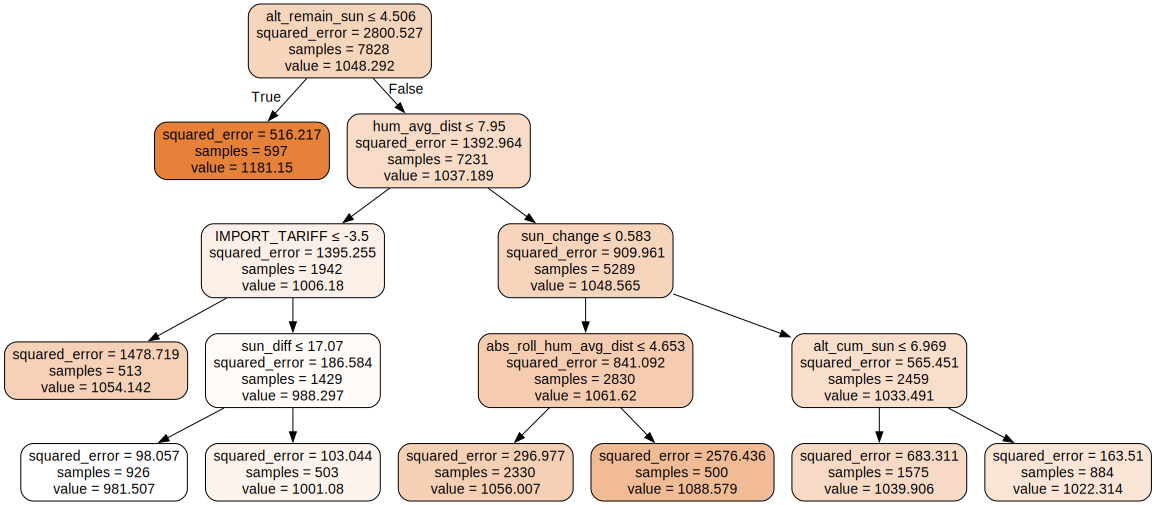

In [109]:
# Assuming 'forest_reg' is your trained Random Forest Regressor
# Visualize the first tree from the random forest
estimator = forest_reg.estimators_[0]

dot_data_rf = export_graphviz(estimator, out_file=None,
                              feature_names=X_train.columns,
                              class_names=['ORCHIDS'],
                              filled=True, rounded=True,
                              special_characters=True)
graph_rf = graphviz.Source(dot_data_rf)
graph_rf.render("random_forest_tree_clean")  # This saves the tree visualization to a file
graph_rf

In [110]:
orchids_cleaned1 = orchids[(orchids['abs_hum_dist'] > 10) & (orchids['day'] <= 1)].dropna().copy() # 
X2 = orchids_cleaned1[features_hl_hum].copy()
y2 = orchids_cleaned1['orchid_shift']
orchids_cleaned1

,day,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,new_timestamp,alt_sun,alt_cum_sun,alt_remain_sun,alt_remain_sun_exp,sun_roll,sun_change,sun_diff,hum_dist,abs_hum_dist,alt_hum_dist,hum_exp,alt_hum_exp,high_low_humidity,mid_humidity,hum_change,hum_diff,abs_hum_dist_diff,hl_hum_ind,hl_hum_ind_v2,hum_avg,hum_avg_dist,abs_hum_avg_dist,roll_hum_avg,roll_hum_avg_dist,abs_roll_hum_avg_dist,tte,hum_dist_change_tte,sun_hum,abs_sun_hum,alt_sun_hum,orchid_diff,orchid_roll_day,orchid_roll_shift,orchid_shift,pnl
177,-1,17700,1215.50,1.3,9.5,-2.2,2486.7410,80.006966,17700,0.0,0.0025,24.995714,7.169697e+08,2479.174171,1.537992,38.24,10.006966,10.006966,0.006966,22180.437817,1.006990,1,1,89.575224,71.66,0.007166,0,1.0,79.458149,9.458149,9.458149,79.772096,9.772096,9.772096,99.823,89478.963448,248.847326,248.847326,0.173226,-0.25,1212.98,1210.63,1214.25,-4.87
178,-1,17800,1215.75,1.4,9.5,-2.2,2487.1277,80.014150,17800,0.0,0.0025,24.995714,7.169697e+08,2479.218604,1.555047,38.67,10.014150,10.014150,0.014150,22340.355820,1.014251,1,1,89.792181,71.84,0.007184,0,1.0,79.461255,9.461255,9.461255,79.778728,9.778728,9.778728,99.822,89759.181040,249.064699,249.064699,0.351929,0.25,1213.34,1210.37,1213.75,-5.38
179,-1,17900,1214.75,1.4,9.5,-2.2,2487.5193,80.021350,17900,0.0,0.0025,24.995714,7.169697e+08,2479.264719,1.574507,39.16,10.021350,10.021350,0.021350,22501.786837,1.021580,1,1,89.984084,72.00,0.007200,0,1.0,79.464367,9.464367,9.464367,79.785376,9.785376,9.785376,99.821,90014.784686,249.283015,249.283015,0.531085,-1.00,1213.60,1210.11,1214.25,-4.64
180,-1,18000,1213.25,1.4,9.5,-2.2,2487.9153,80.028564,18000,0.0,0.0025,24.995714,7.169697e+08,2479.312513,1.591947,39.60,10.028564,10.028564,0.028564,22664.701654,1.028976,1,1,90.150941,72.14,0.007214,0,1.0,79.467484,9.467484,9.467484,79.792041,9.792041,9.792041,99.820,90245.712909,249.502178,249.502178,0.710648,-1.50,1213.82,1209.91,1213.25,-3.34
181,-1,18100,1211.75,1.4,9.5,-2.2,2488.3160,80.035790,18100,0.0,0.0025,24.995714,7.169697e+08,2479.361982,1.610585,40.07,10.035790,10.035790,0.035790,22829.069936,1.036438,1,1,90.292761,72.26,0.007226,0,1.0,79.470606,9.470606,9.470606,79.798721,9.798721,9.798721,99.819,90451.903948,249.722168,249.722168,0.890568,-1.50,1213.94,1209.76,1212.25,-1.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22997,1,299500,1052.75,0.8,8.5,-4.5,2297.4685,80.094950,2299700,0.0,0.0000,25.000000,7.200490e+08,1776.537352,2.194636,50.41,10.094950,10.094950,0.094950,24220.387109,1.099604,1,1,-237.486653,-190.26,-0.019026,1,-1.0,86.963775,16.963775,16.963775,80.759657,10.759657,10.759657,97.005,-232561.327957,231.928296,231.928296,2.181446,-0.50,1053.61,1052.19,1030.75,-0.56
22998,1,299600,1052.75,0.8,8.5,-4.5,2297.9734,80.075935,2299800,0.0,0.0000,25.000000,7.200490e+08,1776.601102,2.197636,50.49,10.075935,10.075935,0.075935,23764.187511,1.078892,1,1,-237.405729,-190.15,-0.019015,1,-1.0,86.961477,16.961477,16.961477,80.740283,10.740283,10.740283,97.004,-232041.783733,231.542306,231.542306,1.744966,0.00,1053.47,1052.07,1030.50,-0.68
22999,1,299700,1052.75,0.8,8.5,-4.5,2298.4790,80.056940,2299900,0.0,0.0000,25.000000,7.200490e+08,1776.665003,2.200200,50.56,10.056940,10.056940,0.056940,23317.046931,1.058592,1,1,-237.212341,-189.95,-0.018995,1,-1.0,86.959174,16.959174,16.959174,80.720919,10.720919,10.720919,97.003,-231413.294129,231.156654,231.156654,1.308754,0.00,1053.37,1051.95,1031.25,-0.80
23000,1,299800,1052.75,0.8,8.5,-4.5,2298.9854,80.037950,2300000,0.0,0.0000,25.000000,7.200490e+08,1776.729053,2.203196,50.64,10.037950,10.037950,0.037950,22878.434021,1.038679,1,1,-237.206169,-189.90,-0.018990,1,-1.0,86.956866,16.956866,16.956866,80.701565,10.701565,10.701565,97.002,-230967.937069,230.771005,230.771005,0.872465,0.00,1053.35,1051.75,1031.25,-1.00


In [111]:
%%time

# Split the data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X2, y2, test_size=0.2, random_state=42)

X_train_scaled1 = X_train1 # scaler.fit_transform(X_train) # 
X_test_scaled1 = X_test1 # scaler.transform(X_test) # 

# Initialize the Linear Regression model
lin_reg1 = LinearRegression() # Lasso(alpha=0.1, max_iter=20000)

# Train the model
lin_reg1.fit(X_train_scaled1, y_train1)

# Make predictions using the testing set
lin_pred1 = lin_reg1.predict(X_test_scaled1)

# Initialize the Random Forest Regressor
forest_reg1 = RandomForestRegressor(n_estimators=250, max_depth=4, min_samples_leaf=500, min_samples_split=1200, random_state=42)

# Train the model
forest_reg1.fit(X_train_scaled1, y_train1)

# Make predictions using the testing set
forest_pred1 = forest_reg1.predict(X_test_scaled1)

CPU times: total: 7.89 s
Wall time: 7.89 s


In [112]:
# For Linear Regression
lin_r2 = r2_score(y_test1, lin_pred1)
lin_mse = mean_squared_error(y_test1, lin_pred1)
lin_mae = mean_absolute_error(y_test1, lin_pred1)

feature_names1 = X_train1.columns
coefficients1 = lin_reg1.coef_

print(f"Linear Regression R2: {lin_r2}")
print(f"Linear Regression MSE: {lin_mse}")
print(f"Linear Regression MAE: {lin_mae}")

for feature, coef in zip(feature_names1, coefficients1):
    print(f'{feature}: {coef}')
print("Intercept:", lin_reg1.intercept_)

# For Random Forest Regressor
forest_r2 = r2_score(y_test1, forest_pred1)
forest_mse = mean_squared_error(y_test1, forest_pred1)
forest_mae = mean_absolute_error(y_test1, forest_pred1)

print(f"Random Forest R2: {forest_r2}")
print(f"Random Forest MSE: {forest_mse}")
print(f"Random Forest MAE: {forest_mae}")

Linear Regression R2: 0.9449549540479003
Linear Regression MSE: 237.81745341798384
Linear Regression MAE: 12.583171866655022
alt_cum_sun: -3.405272627716833
alt_remain_sun: -6.4954718824738915
sun_change: 18.43528686277209
sun_diff: -0.48408585444698765
abs_hum_dist: -9.910665683931134
hum_change: -0.5116469689238401
hum_diff: 0.6223362515001702
hum_avg: -8.027514511043874
roll_hum_avg: 7.369666281073273
hl_hum_ind_v2: -7.678517533066649
hum_avg_dist: -8.027514511043869
roll_hum_avg_dist: 7.369666281073299
SUNLIGHT: 0.03268876764743833
TRANSPORT_FEES: 19.18579159400227
EXPORT_TARIFF: 5.991365999808077
IMPORT_TARIFF: 22.06161650000588
Intercept: 1385.2188354369778
Random Forest R2: 0.9356425704520099
Random Forest MSE: 278.0508170880451
Random Forest MAE: 12.232445399588642


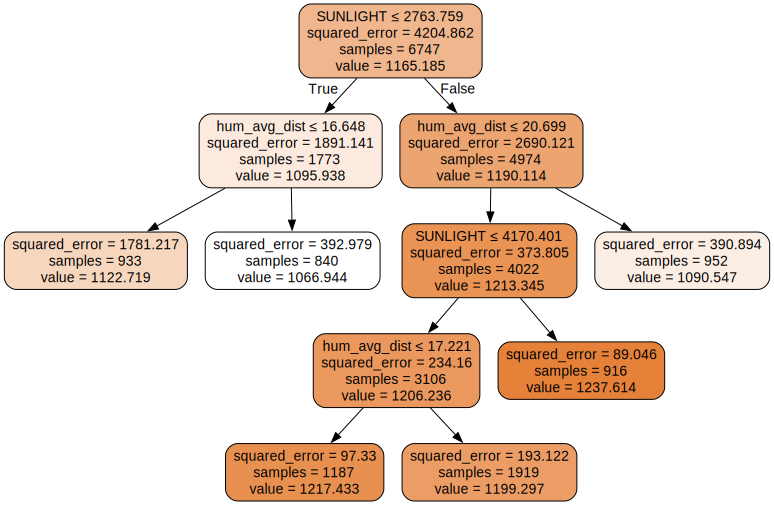

In [113]:
# Assuming 'forest_reg' is your trained Random Forest Regressor
# Visualize the first tree from the random forest
estimator1 = forest_reg1.estimators_[0]

dot_data_rf1 = export_graphviz(estimator1, out_file=None,
                              feature_names=X_train1.columns,
                              class_names=['ORCHIDS'],
                              filled=True, rounded=True,
                              special_characters=True)
graph_rf1 = graphviz.Source(dot_data_rf1)
graph_rf1.render("random_forest_tree_clean1")  # This saves the tree visualization to a file
graph_rf1

In [114]:
# prices_0.head(50)

In [115]:
print(orchids_cleaned.describe())

                day      timestamp       ORCHIDS  TRANSPORT_FEES  \
count  15478.000000   15478.000000  15478.000000    15478.000000   
mean       0.380734  596669.227290   1049.662989        1.151027   
std        0.643019  227560.450913     51.077382        0.312065   
min       -1.000000       0.000000    960.750000        0.700000   
25%        0.000000  439400.000000   1018.250000        0.900000   
50%        0.000000  631950.000000   1041.750000        1.100000   
75%        1.000000  766675.000000   1072.250000        1.400000   
max        1.000000  960100.000000   1215.750000        2.100000   

       EXPORT_TARIFF  IMPORT_TARIFF      SUNLIGHT      HUMIDITY  \
count   15478.000000   15478.000000  15478.000000  15478.000000   
mean        9.659452      -3.739081   2317.059804     71.850830   
std         1.400220       1.268391    662.577895      4.591365   
min         7.500000      -6.500000   1397.304900     60.000000   
25%         8.500000      -5.000000   1898.874700   

In [116]:
print(orchids_cleaned1.describe())

                day      timestamp       ORCHIDS  TRANSPORT_FEES  \
count  13327.000000   13327.000000  13327.000000    13327.000000   
mean      -0.442110  344644.256022   1166.831639        1.340812   
std        0.772632  267938.408613     61.493368        0.221992   
min       -1.000000       0.000000   1013.250000        0.800000   
25%       -1.000000  139100.000000   1107.750000        1.200000   
50%       -1.000000  250200.000000   1198.000000        1.300000   
75%        0.000000  507650.000000   1216.250000        1.500000   
max        1.000000  960100.000000   1257.250000        2.100000   

       EXPORT_TARIFF  IMPORT_TARIFF      SUNLIGHT      HUMIDITY  \
count   13327.000000   13327.000000  13327.000000  13327.000000   
mean        9.829932      -3.010925   3315.996117     88.053882   
std         1.374190       1.084659    863.320184      4.598257   
min         8.500000      -6.000000   1669.296600     59.999580   
25%         8.500000      -3.000000   2692.517200   

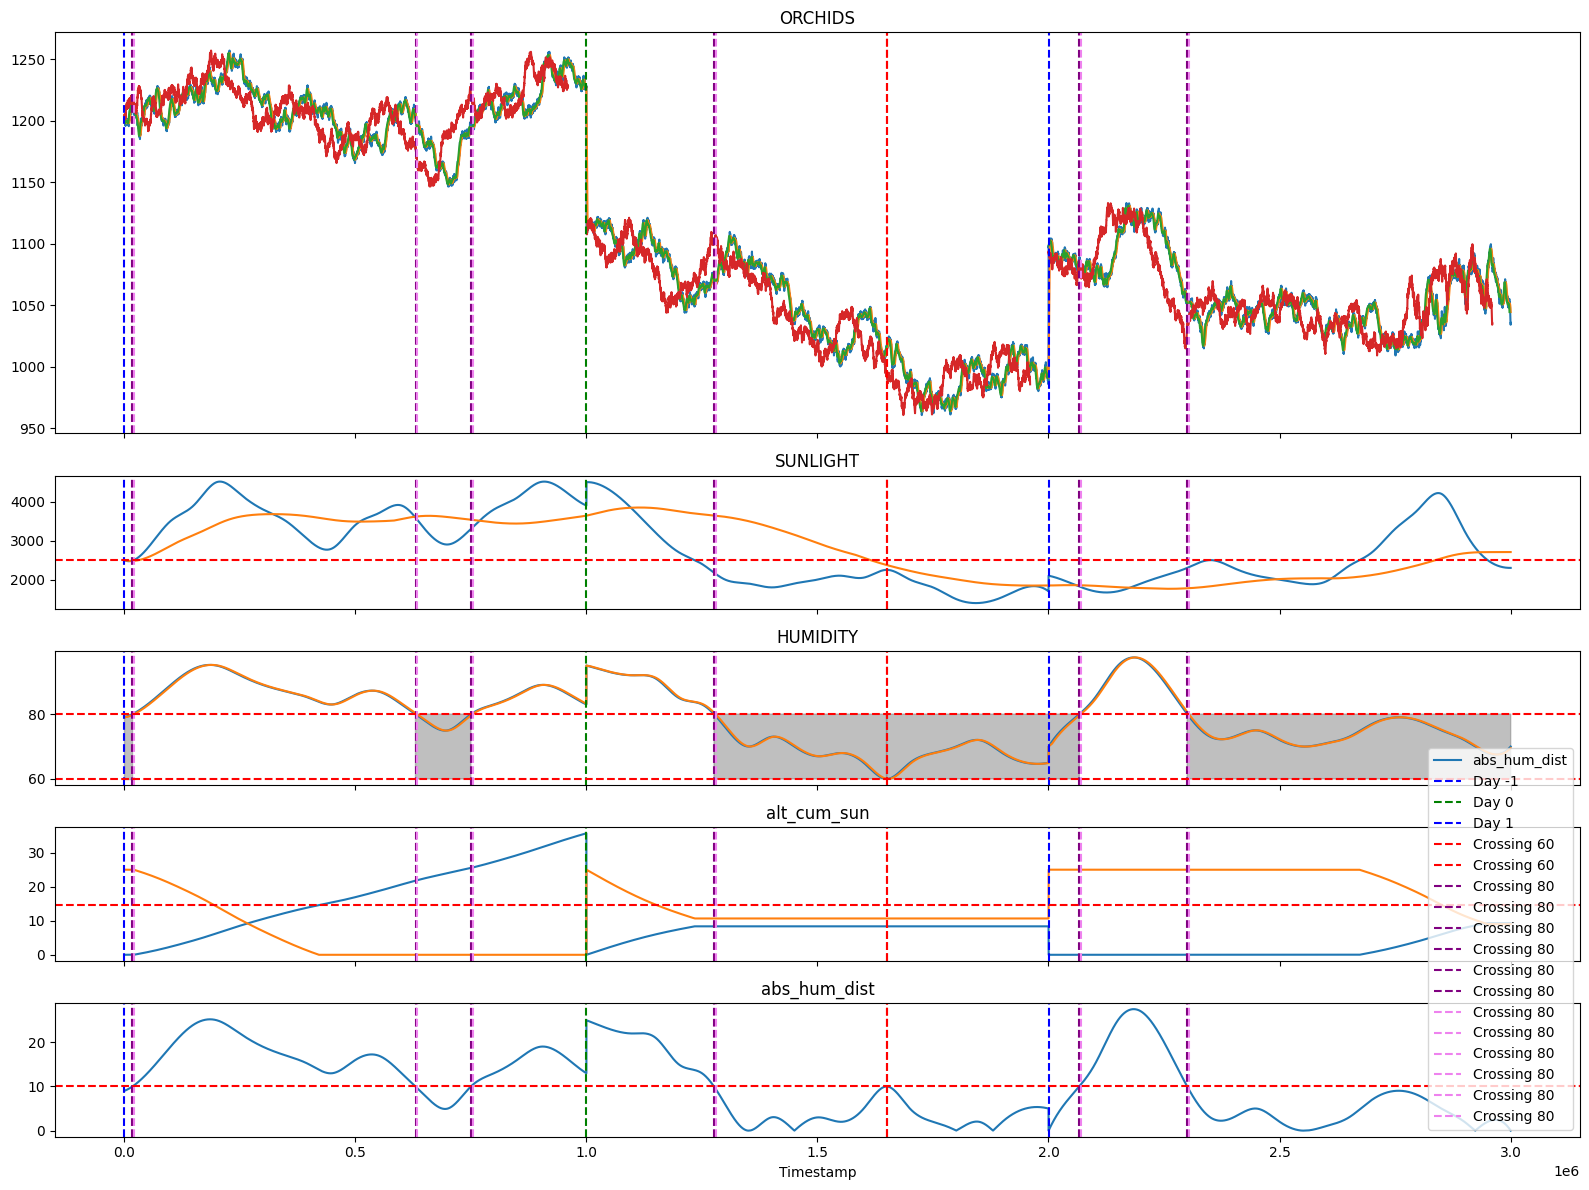

In [104]:
def plot_orchids_sunlight_humidity2(df):
    fig, axs = plt.subplots(5, 1, sharex=True, figsize=(16, 12), gridspec_kw={'height_ratios': [3, 1, 1, 1, 1]})
    
    # Plot ORCHIDS vs new_timestamp
    axs[0].plot(df['new_timestamp'], df['ORCHIDS'], label='ORCHIDS')
    axs[0].plot(df['new_timestamp'], df['orchid_roll_day'], label='roll')
    axs[0].plot(df['new_timestamp'], df['orchid_roll_shift'], label='roll_shift')
    axs[0].plot(df['new_timestamp'], df['orchid_shift'], label='SHIFT')
    axs[0].set_title('ORCHIDS')
    
    # Plot SUNLIGHT vs new_timestamp
    axs[1].plot(df['new_timestamp'], df['SUNLIGHT'], label='SUNLIGHT')
    axs[1].plot(df['new_timestamp'], df['sun_roll'], label='sun_roll')
    axs[1].set_title('SUNLIGHT')
    
    # Plot HUMIDITY vs new_timestamp
    axs[2].plot(df['new_timestamp'], df['HUMIDITY'], label='HUMIDITY')
    axs[2].plot(df['new_timestamp'], df['roll_hum_avg'], label='roll_hum_avg')
    axs[2].set_title('HUMIDITY')
    
    # Plot cum_sun vs new_timestamp
    axs[3].plot(df['new_timestamp'], df['alt_cum_sun'], label='alt_cum_sun')
    axs[3].plot(df['new_timestamp'], df['alt_remain_sun'], label='alt_remain_sun')
    axs[3].set_title('alt_cum_sun')

    # HUM dist
    axs[4].plot(df['new_timestamp'], df['abs_hum_dist'], label='abs_hum_dist')
    axs[4].set_title('abs_hum_dist')
    
    # Add vertical lines at timestamps to signify day for all plots
    for ax in axs:
        ax.axvline(0, color='blue', linestyle='--', label='Day -1')
        ax.axvline(1000100, color='green', linestyle='--', label='Day 0')
        ax.axvline(2000200, color='blue', linestyle='--', label='Day 1')

        # Detecting threshold crossings for HUMIDITY at 60 and 80
    for threshold in [60, 80]:
        # Shift humidity data down by one to compare with the previous row
        shifted_humidity = df['HUMIDITY'].shift(1)
        # Crossing up the threshold
        crossing_up = (df['HUMIDITY'] > threshold) & (shifted_humidity <= threshold)
        # Crossing down the threshold
        crossing_down = (df['HUMIDITY'] < threshold) & (shifted_humidity >= threshold)
        # Combine crossing up and down
        crossings = crossing_up | crossing_down

        # Draw vertical lines at crossings
        for timestamp in df.loc[crossings, 'new_timestamp']:
            for ax in axs:
                ax.axvline(timestamp, color='red' if threshold == 60 else 'purple', linestyle='--', 
                           label=f'Crossing {threshold}')
                
        # Shift humidity data down by one to compare with the previous row
        shifted_humidity1 = df['roll_hum_avg'].shift(1)
        # Crossing up the threshold
        crossing_up1 = (df['roll_hum_avg'] > threshold) & (shifted_humidity1 <= threshold)
        # Crossing down the threshold
        crossing_down1 = (df['roll_hum_avg'] < threshold) & (shifted_humidity1 >= threshold)
        # Combine crossing up and down
        crossings1 = crossing_up1 | crossing_down1

        # Draw vertical lines at crossings
        for timestamp in df.loc[crossings1, 'new_timestamp']:
            for ax in axs:
                ax.axvline(timestamp, color='pink' if threshold == 60 else 'violet', linestyle='--', 
                           label=f'Crossing {threshold}')
    
    # Highlighting region between 60 and 80 for HUMIDITY
    axs[2].fill_between(df['new_timestamp'], 60, 80, where=(df['HUMIDITY'] >= 60) & (df['HUMIDITY'] <= 80), color='gray', alpha=0.5, label='Target Humidity Zone')
    
    # Red lines for thresholds
    axs[1].axhline(2500, color='red', linestyle='--', label='Sunlight Threshold')
    axs[2].axhline(60, color='red', linestyle='--')
    axs[2].axhline(80, color='red', linestyle='--')
    axs[3].axhline(25*7/12, color='red', linestyle='--', label='Cum Sun Threshold')
    axs[4].axhline(10, color='red', linestyle='--')

    axs[-1].set_xlabel('Timestamp')
    
    plt.tight_layout()
    plt.legend()
    plt.show()

plot_orchids_sunlight_humidity2(orchids)